<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/Churn_ANN_Hands_On-Keras-Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data input
import pandas as pd
import numpy as np

#Visualisation libraries
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



# File Handling

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Intellipaat-Jan2026/Churn.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA - Exploratory Data Analysis

In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Univariate Analysis - Categorical/Numerical

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
categorical_variables=['Geography','Gender','HasCrCard','NumOfProducts','IsActiveMember','Exited','Tenure']
numerical_variables = list(set(df.columns) - set(categorical_variables))

In [9]:
numerical_variables.remove('RowNumber')
numerical_variables.remove('CustomerId')
numerical_variables.remove('Surname')

In [10]:
categorical_variables

['Geography',
 'Gender',
 'HasCrCard',
 'NumOfProducts',
 'IsActiveMember',
 'Exited',
 'Tenure']

In [11]:
numerical_variables

['Age', 'CreditScore', 'EstimatedSalary', 'Balance']

## Categorical Variables

Geography

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


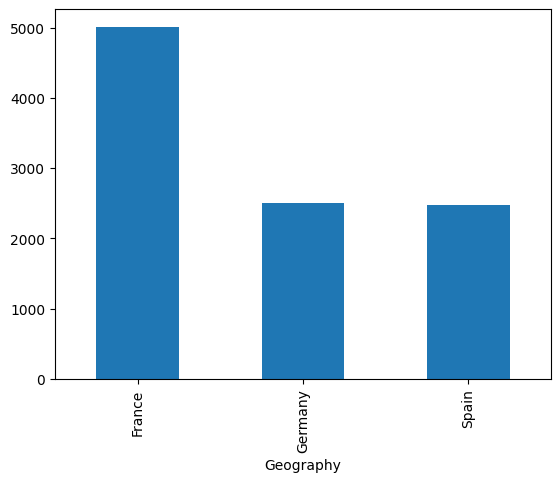

**************************************************
Gender

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


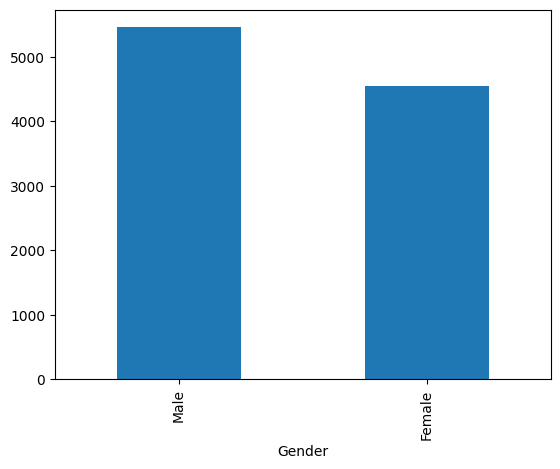

**************************************************
HasCrCard

HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


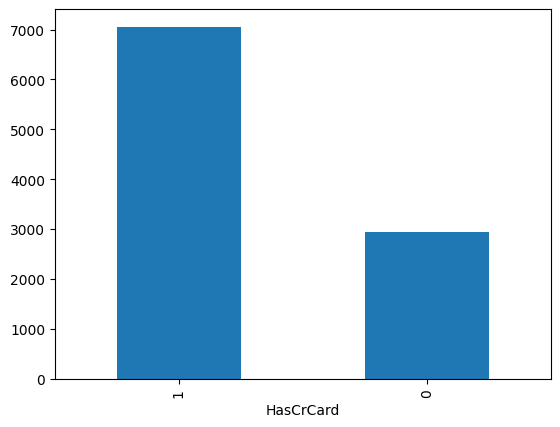

**************************************************
NumOfProducts

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


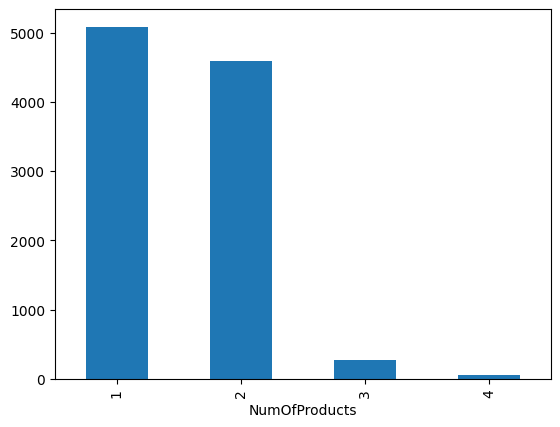

**************************************************
IsActiveMember

IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


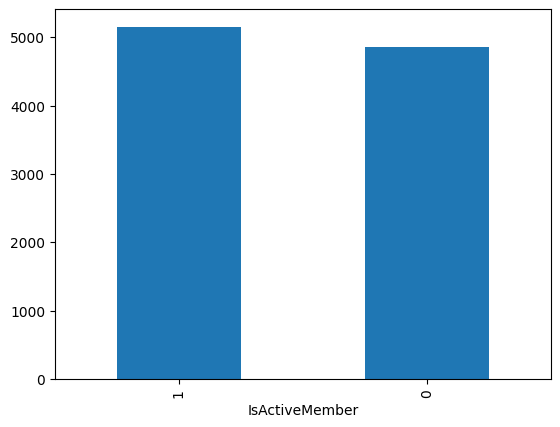

**************************************************
Exited

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


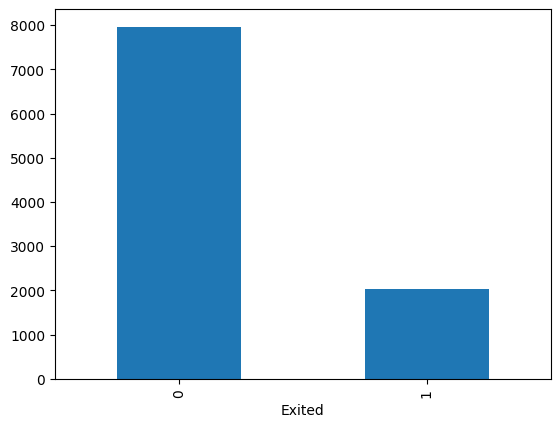

**************************************************
Tenure

Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: proportion, dtype: float64
--------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


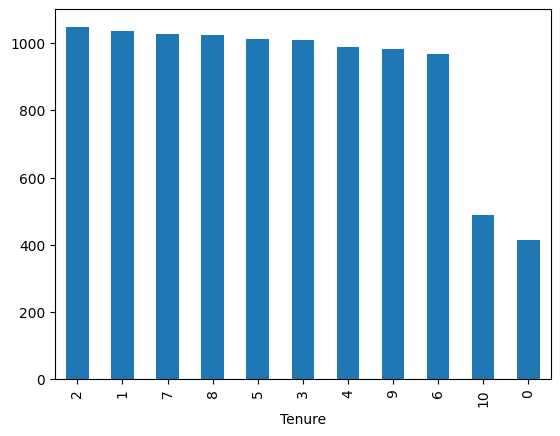

**************************************************


In [12]:
for feat in categorical_variables:
    print(feat)
    print()
#     print(df[feat].value_counts())
#     print("-"*50)
    print(df[feat].value_counts(normalize=True)*100)
    print("-"*50)
    print(df[feat].value_counts().plot.bar())
    plt.show()
    print("*"*50)

## Numerical Features

Age


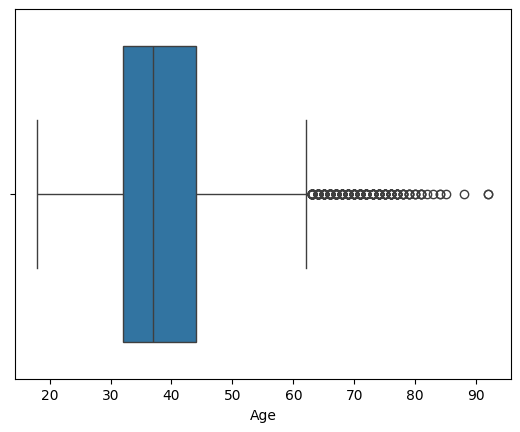

**************************************************
CreditScore


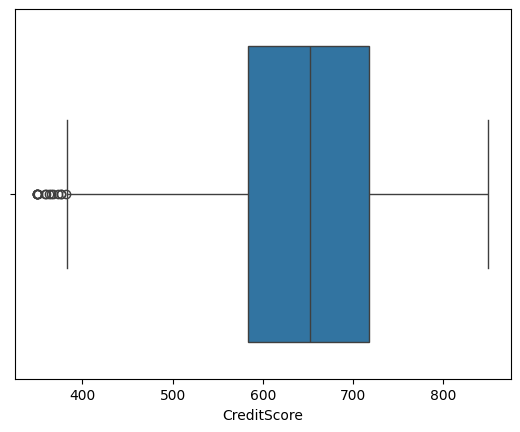

**************************************************
EstimatedSalary


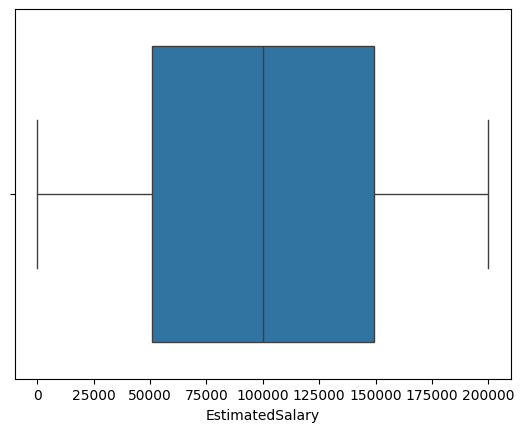

**************************************************
Balance


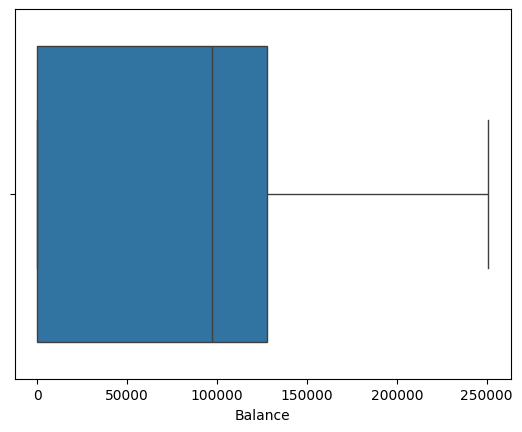

**************************************************


In [13]:
for feat in numerical_variables:
    print(feat)
    sns.boxplot(df[feat],orient='h')
    plt.show()
    print("*"*50)

# Bivarate Analysis - two variables at a time

Age


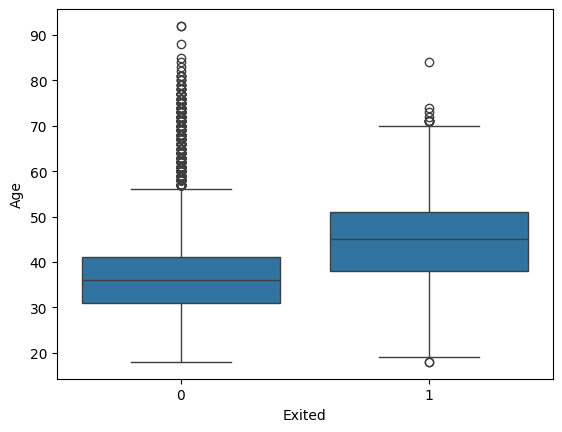

**************************************************
CreditScore


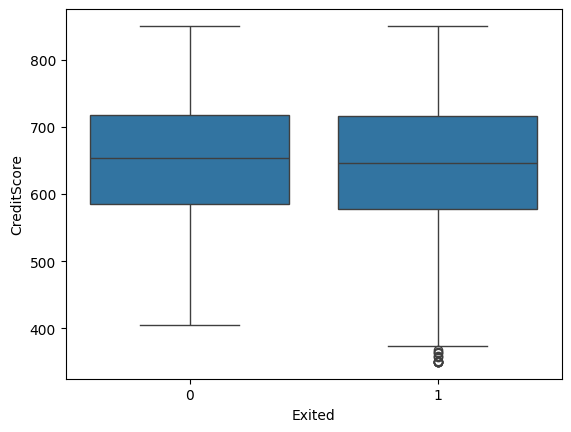

**************************************************
EstimatedSalary


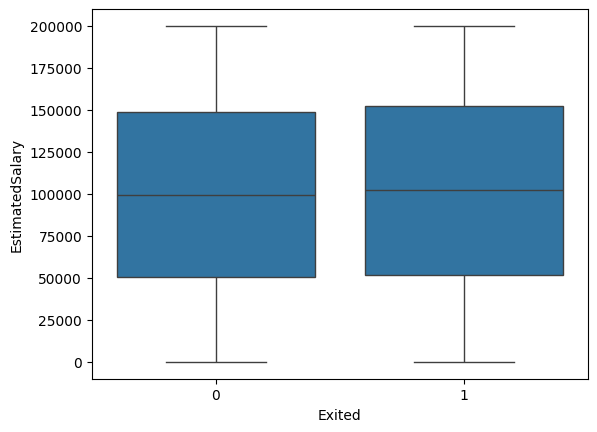

**************************************************
Balance


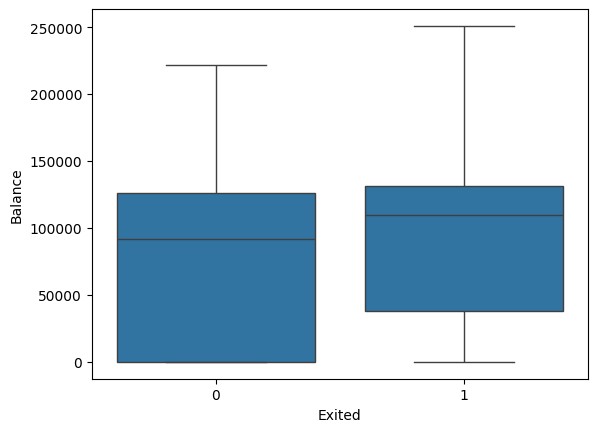

**************************************************


In [14]:
for feat in numerical_variables:
    print(feat)
    sns.boxplot(x='Exited',y=feat,data=df)
    plt.show()
    print("*"*50)

# Multivariate ANalysis

<Axes: >

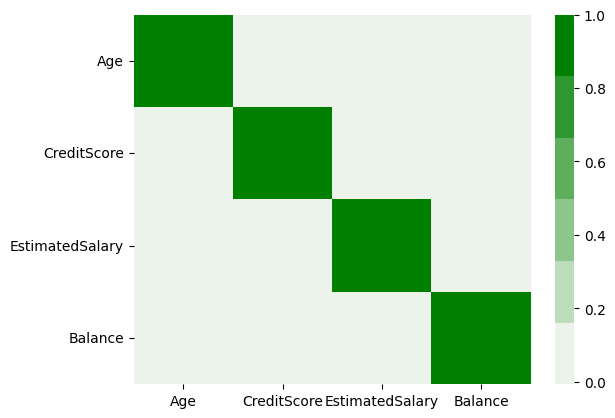

In [15]:
smap=sns.light_palette("green")
sns.heatmap(df[numerical_variables].corr(),cmap=smap)

In [16]:
variable=numerical_variables +['Exited']

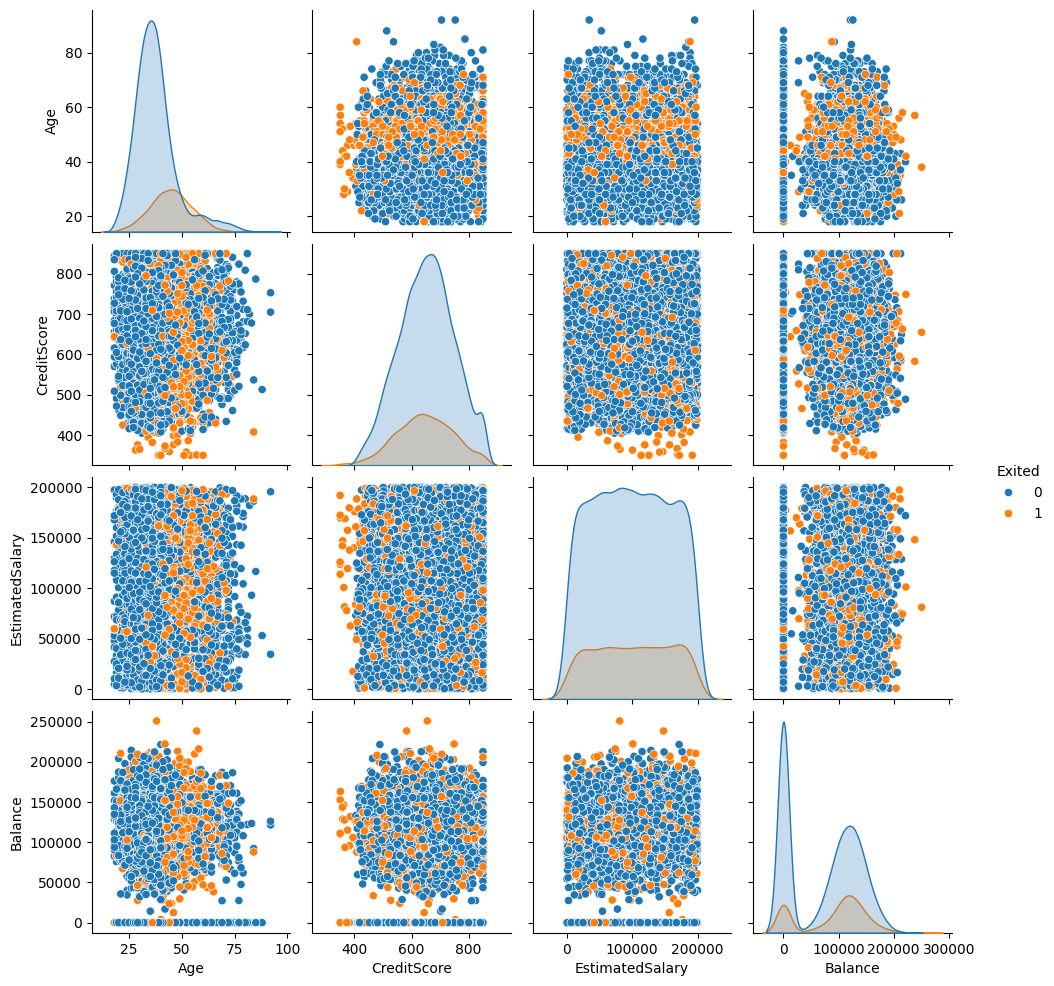

In [17]:
sns.pairplot(df[variable],hue='Exited')

# Modeling

In [18]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
df['Gender']=df['Gender'].map({'Female':1, 'Male':0}).astype('int')
df['Geography']=df['Geography'].map({'France':0, 'Spain':1, 'Germany':2}).astype('int')

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [21]:
numerical_variables+categorical_variables

['Age',
 'CreditScore',
 'EstimatedSalary',
 'Balance',
 'Geography',
 'Gender',
 'HasCrCard',
 'NumOfProducts',
 'IsActiveMember',
 'Exited',
 'Tenure']

In [22]:
churn=df.loc[:,numerical_variables+categorical_variables]

In [23]:
churn.head()

,Age,CreditScore,EstimatedSalary,Balance,Geography,Gender,HasCrCard,NumOfProducts,IsActiveMember,Exited,Tenure
0,42,619,101348.88,0.00,0,1,1,1,1,1,2
1,41,608,112542.58,83807.86,1,1,0,1,1,0,1
2,42,502,113931.57,159660.80,0,1,1,3,0,1,8
3,39,699,93826.63,0.00,0,1,0,2,0,0,1
4,43,850,79084.10,125510.82,1,1,1,1,1,0,2


In [24]:
X=churn.drop(columns='Exited')
y=churn.loc[:,'Exited']

In [25]:
# Train Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(6700, 10) (3300, 10) (6700,) (3300,)


# Model using sklearn classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [28]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_pred=clf.predict(X_test)

In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [31]:
y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
1744,0
9754,0
6094,0
8781,0


# Model Evaluation

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2657
           1       0.44      0.47      0.46       643

    accuracy                           0.78      3300
   macro avg       0.66      0.66      0.66      3300
weighted avg       0.79      0.78      0.78      3300



# Deep Learning

In [34]:
# !pip install pydot

In [35]:
# !pip install keras
# !pip install tensorflow

# Keras sequential API

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import keras
from keras import layers
from keras import ops

In [37]:
classfier=Sequential()
classfier.add(Dense(5,activation='relu', input_dim=10))
# classfier.add(Dense(10, activation='relu'))
# classfier.add(Dense(100, activation='relu'))
#Output
classfier.add(Dense(1, activation='sigmoid'))

classfier.summary()
classfier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
classfier.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7738 - loss: 60542.2422 - val_accuracy: 0.8052 - val_loss: 0.5753
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.5676 - val_accuracy: 0.8052 - val_loss: 0.5305
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7883 - loss: 0.5385 - val_accuracy: 0.8052 - val_loss: 0.5118
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7944 - loss: 0.5198 - val_accuracy: 0.8052 - val_loss: 0.5032
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7953 - loss: 0.5128 - val_accuracy: 0.8052 - val_loss: 0.4989
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7918 - loss: 0.5139 - val_accuracy: 0.8052 - val_loss: 0.4967
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7974 - loss: 0.5059 - val_accuracy: 0.8052 - val_loss: 0.4956
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7918 - loss: 0.5122 - val_accuracy

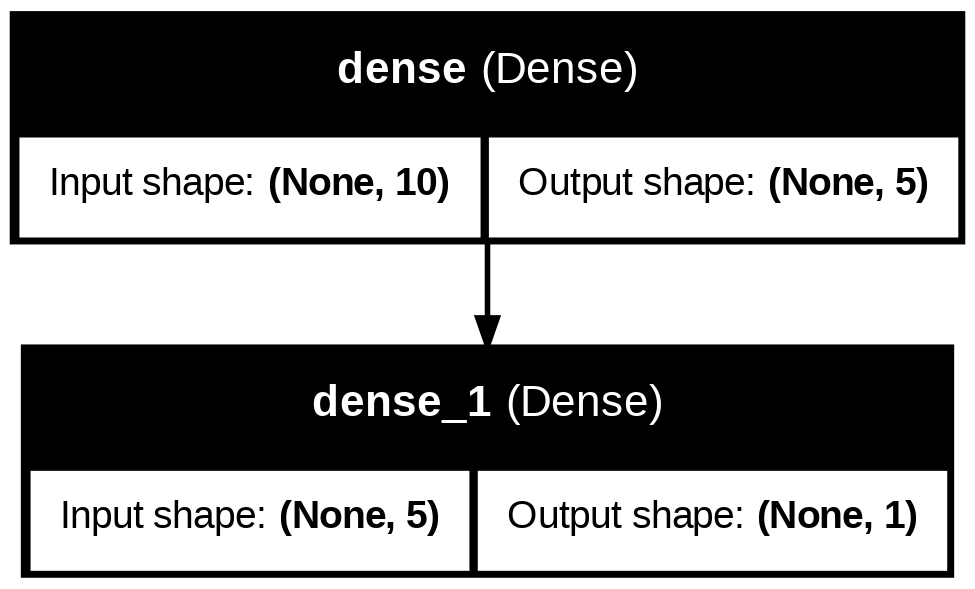

In [38]:
keras.utils.plot_model(classfier, "my_first_model.png",show_shapes=True, show_layer_names=True)

https://keras.io/guides/sequential_model/
![image.png](attachment:67f516c6-caf7-4b5d-8876-2c002957dbec.png)

In [40]:
# Define Sequential model with 3 layers
model_alternate = Sequential(
    [
        Dense(5, activation="relu", name="layer1",input_dim=10),
        Dense(1, activation="sigmoid", name="layer2")
    ]
)

model_alternate.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

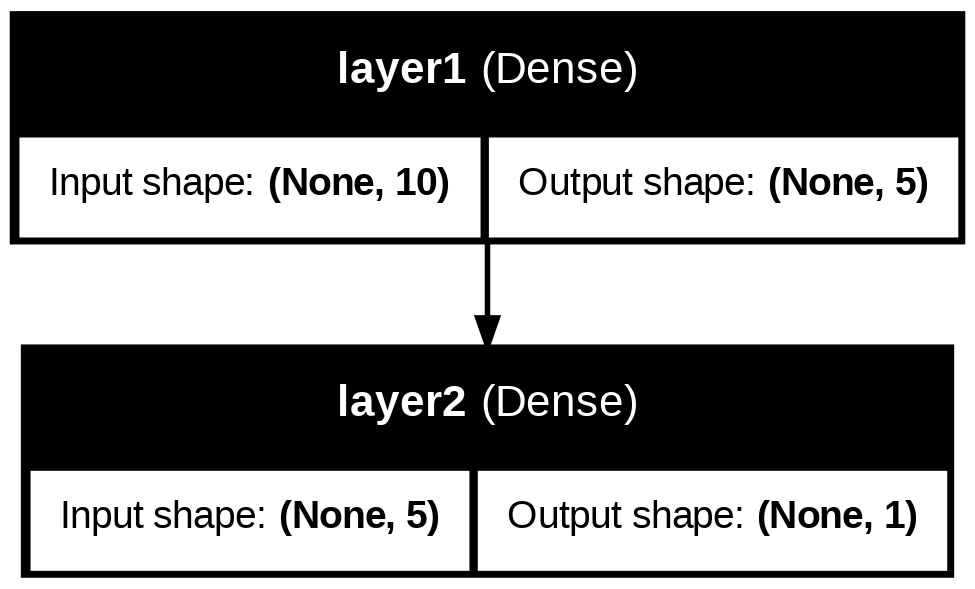

In [41]:
keras.utils.plot_model(model_alternate, "my_first_model.png",show_shapes=True, show_layer_names=True)

In [42]:

model_alternate.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model_alternate.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7695 - loss: 614097944576.0000 - val_accuracy: 0.8052 - val_loss: 0.5755
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7961 - loss: 0.5665 - val_accuracy: 0.8052 - val_loss: 0.5306
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7899 - loss: 0.5372 - val_accuracy: 0.8052 - val_loss: 0.5118
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7828 - loss: 0.5314 - val_accuracy: 0.8052 - val_loss: 0.5031
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7995 - loss: 0.5080 - val_accuracy: 0.8052 - val_loss: 0.4989
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7981 - loss: 0.5066 - val_accuracy: 0.8052 - val_loss: 0.4967
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7918 - loss: 0.5127 - val_accuracy: 0.8052 - val_loss: 0.4955
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7950 - loss: 0.5080 - val_a

# Keras Functional API
https://keras.io/api/models/

In [43]:
# Input Layer
inputs=keras.Input(shape=(10,))

#Hidden Layer
hidden1=Dense(5, activation="relu")(inputs)

#Output Layer
outputs=Dense(1, activation="sigmoid")(hidden1)

model=keras.Model(inputs=inputs, outputs=outputs, name="churn_model")
model.summary()


Model: "churn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7680 - loss: 331575.7812 - val_accuracy: 0.8052 - val_loss: 0.5752
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7885 - loss: 0.5700 - val_accuracy: 0.8052 - val_loss: 0.5307
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7896 - loss: 0.5376 - val_accuracy: 0.8052 - val_loss: 0.5118
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7927 - loss: 0.5215 - val_accuracy: 0.8052 - val_loss: 0.5031
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7907 - loss: 0.5177 - val_accuracy: 0.8052 - val_loss: 0.4990
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7829 - loss: 0.5244 - val_accuracy: 0.8052 - val_loss: 0.4967
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.5093 - val_accuracy: 0.8052 - val_loss: 0.4955
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8006 - loss: 0.5010 - val_accura

### Using Input layer separately
![Screenshot 2024-07-06 at 2.27.56 PM.png](attachment:e8b251f9-759e-4865-bc7d-ec8cbf14ce87.png)

Purpose of the Keras Input Layer
The primary purpose of the Input Layer in Keras is to define the input’s shape (or dimensionality). This specification is crucial because the subsequent layers in the network need to know the shape of their input tensor to correctly configure themselves. The input layer does not alter data; it simply passes it on to the next layer.

The Keras functional API is a way to create models that are more flexible than the keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.



![image.png](attachment:ef6c0631-ddfb-4fda-830a-d16d5aa2cbce.png)

In [ ]:
from keras.layers import Input

In [ ]:
inputs=keras.Input(shape=(10,))
#Hidden
hidden=layers.Dense(5, activation="relu")(inputs)
# hidden2=layers.Dense(5, activation="relu")(hidden1)
# hidden3=layers.Dense(5, activation="relu")(hidden2)
outputs = layers.Dense(1,activation="sigmoid")(hidden)
model = keras.Model(inputs=inputs, outputs=outputs, name="churn_model")
model.summary()

Model: "churn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# For reference
# classfier=Sequential()
# classfier.add(Dense(5,activation='relu', input_dim=10))
# classfier.add(Dense(1, activation='sigmoid'))
# classfier.summary()


In [ ]:
model.compile()

In [ ]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,  validation_data=(X_test, y_test))

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.7724 - loss: 280.0156 - val_accuracy: 0.8052 - val_loss: 0.5755
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.7862 - loss: 0.5719 - val_accuracy: 0.8052 - val_loss: 0.5306
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7906 - loss: 0.5363 - val_accuracy: 0.8052 - val_loss: 0.5118
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.7910 - loss: 0.5228 - val_accuracy: 0.8052 - val_loss: 0.5030
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.7971 - loss: 0.5106 - val_accuracy: 0.8052 - val_loss: 0.4989
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.7925 - loss: 0.5129 - val_accuracy: 0.8052 - val_loss: 0.4966
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7957 - loss: 0.5078 - val_accuracy: 0.8052 - val_loss: 0.4954
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.7858 - loss: 0.5195 

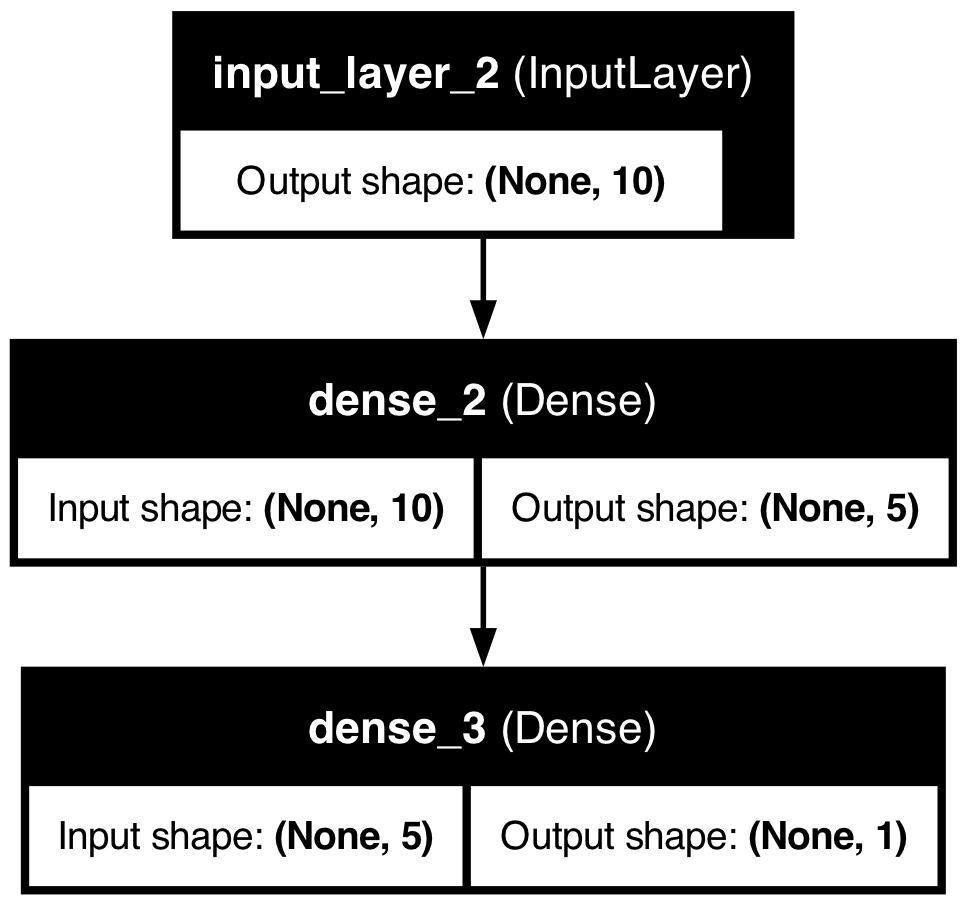

In [ ]:
keras.utils.plot_model(model, "my_first_model.png",show_shapes=True, show_layer_names=True)

In [ ]:
X_train

,Balance,EstimatedSalary,CreditScore,Age,Geography,Gender,HasCrCard,NumOfProducts,IsActiveMember,Tenure
8371,106059.40,187976.88,813,29,2,1,0,1,0,5
5027,73179.34,25292.53,681,37,2,0,1,2,1,8
9234,120688.61,24770.22,642,49,2,0,1,1,0,4
3944,117989.76,54129.86,612,31,0,1,1,1,1,8
6862,0.00,6975.02,586,33,0,0,1,1,0,9
...,...,...,...,...,...,...,...,...,...,...
5734,69712.74,69381.05,768,54,0,0,1,1,1,8
5191,0.00,706.50,682,58,0,1,1,1,1,1
5390,0.00,92220.12,735,38,0,1,0,3,0,1
860,190227.46,97508.04,667,43,0,0,1,1,0,8


# How can we imporove this model

In [45]:
# prompt: Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(5, activation='relu', input_dim=10))
# model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10,  validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6697 - loss: 0.6469 - val_accuracy: 0.7997 - val_loss: 0.5317
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7901 - loss: 0.5187 - val_accuracy: 0.8094 - val_loss: 0.4665
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7987 - loss: 0.4639 - val_accuracy: 0.8142 - val_loss: 0.4375
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7971 - loss: 0.4466 - val_accuracy: 0.8227 - val_loss: 0.4216
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8135 - loss: 0.4307 - val_accuracy: 0.8273 - val_loss: 0.4115
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8132 - loss: 0.4338 - val_accuracy: 0.8315 - val_loss: 0.4027
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8251 - loss: 0.4148 - val_accuracy: 0.8352 - val_loss: 0.3963
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8306 - loss: 0.3970 - val_accuracy: 

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
0.8159095578392357


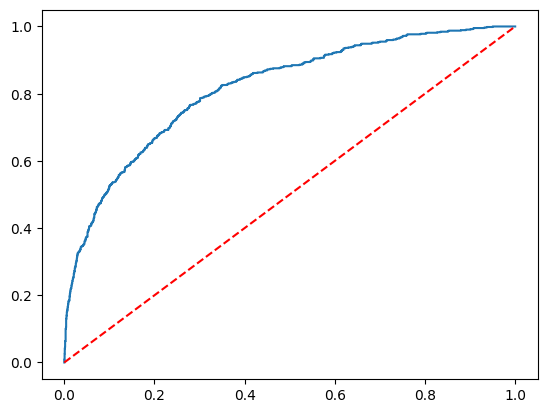

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2657
           1       0.75      0.25      0.38       643

    accuracy                           0.84      3300
   macro avg       0.80      0.62      0.64      3300
weighted avg       0.83      0.84      0.80      3300



In [46]:
#Predictions
y_pred_dl=model.predict(X_test)

#ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dl)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot
plt.figure()
plt.plot(fpr,tpr, label=f"AUC = {roc_auc}")
plt.plot([0,1],[0,1],"r--", label="Random Guess")
plt.show()


y_pred_dl1=[]
for i in y_pred_dl:
  if i>0.6:
    y_pred_dl1.append(1)
  else:
    y_pred_dl1.append(0)

print(classification_report(y_test,y_pred_dl1))

# Lets Imporve further

In [47]:
# Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8044 - loss: 0.4947 - val_accuracy: 0.8352 - val_loss: 0.3968
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.3957 - val_accuracy: 0.8588 - val_loss: 0.3614
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3622 - val_accuracy: 0.8582 - val_loss: 0.3494
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.3494 - val_accuracy: 0.8648 - val_loss: 0.3467
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8482 - loss: 0.3614 - val_accuracy: 0.8606 - val_loss: 0.3421
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8622 - loss: 0.3354 - val_accuracy: 0.8633 - val_loss: 0.3422
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3304 - val_accuracy: 0.8621 - val_loss: 0.3449
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8634 - loss: 0.3309 - val_accuracy: 0.

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.8562662903413678


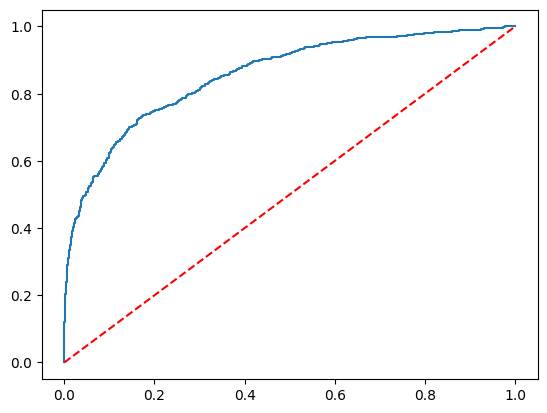

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2657
           1       0.76      0.46      0.57       643

    accuracy                           0.87      3300
   macro avg       0.82      0.71      0.74      3300
weighted avg       0.86      0.87      0.85      3300



In [48]:
#Predictions
y_pred_dl=model.predict(X_test)

#ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dl)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot
plt.figure()
plt.plot(fpr,tpr, label=f"AUC = {roc_auc}")
plt.plot([0,1],[0,1],"r--", label="Random Guess")
plt.show()


y_pred_dl1=[]
for i in y_pred_dl:
  if i>0.6:
    y_pred_dl1.append(1)
  else:
    y_pred_dl1.append(0)

print(classification_report(y_test,y_pred_dl1))

In [ ]:
# Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.7167 - loss: 0.5442 - val_accuracy: 0.8297 - val_loss: 0.4089
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8213 - loss: 0.4156 - val_accuracy: 0.8485 - val_loss: 0.3766
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8453 - loss: 0.3828 - val_accuracy: 0.8545 - val_loss: 0.3539
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.8531 - loss: 0.3597 - val_accuracy: 0.8603 - val_loss: 0.3455
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8573 - loss: 0.3473 - val_accuracy: 0.8603 - val_loss: 0.3404
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8605 - loss: 0.3363 - val_accuracy: 0.8618 - val_loss: 0.3402
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8645 - loss: 0.3371 - val_accuracy: 0.8639 - val_loss: 0.3402
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8593 - loss: 0.3393 - val_accurac

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


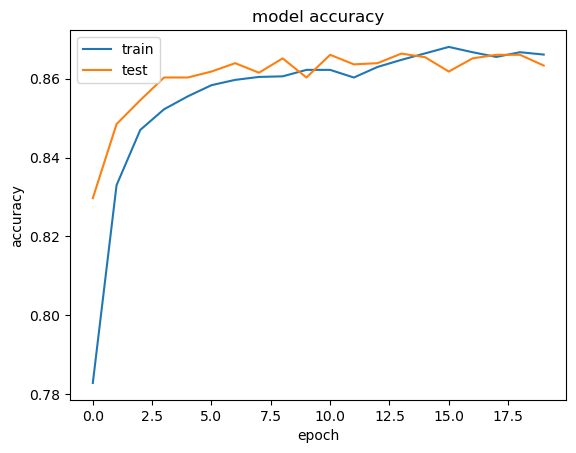

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

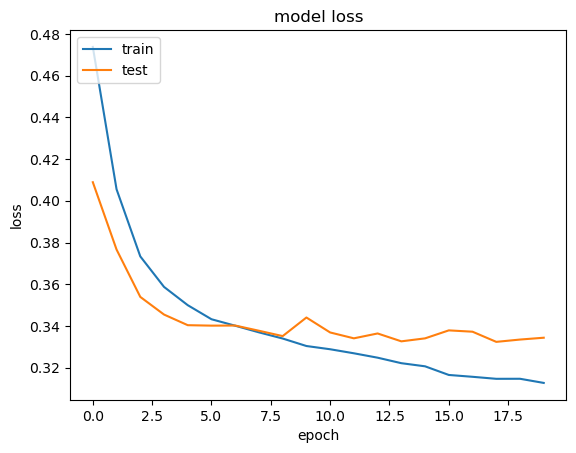

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
# Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
# Build the ANN model
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=10))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(32, activation='relu'))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6690 - loss: 0.6265 - val_accuracy: 0.8145 - val_loss: 0.4328
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7940 - loss: 0.4873 - val_accuracy: 0.8215 - val_loss: 0.4201
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.4679 - val_accuracy: 0.8279 - val_loss: 0.4119
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8053 - loss: 0.4434 - val_accuracy: 0.8330 - val_loss: 0.4053
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8051 - loss: 0.4528 - val_accuracy: 0.8394 - val_loss: 0.3953
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8020 - loss: 0.4431 - val_accuracy: 0.8464 - val_loss: 0.3847
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8184 - loss: 0.4275 - val_accuracy: 0.8521 - val_loss: 0.3727
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8253 - loss: 0.4228 - val_accuracy: 0.8591 - val_

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


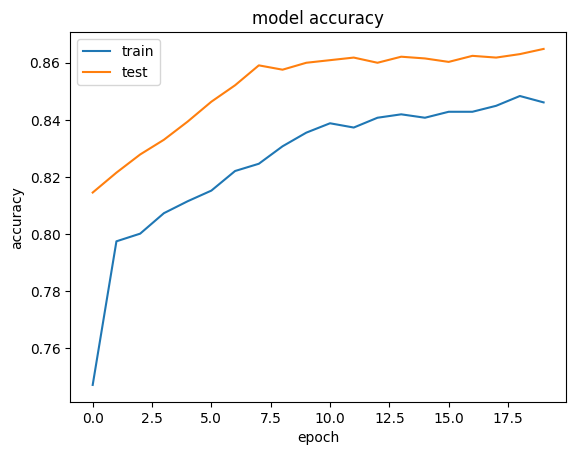

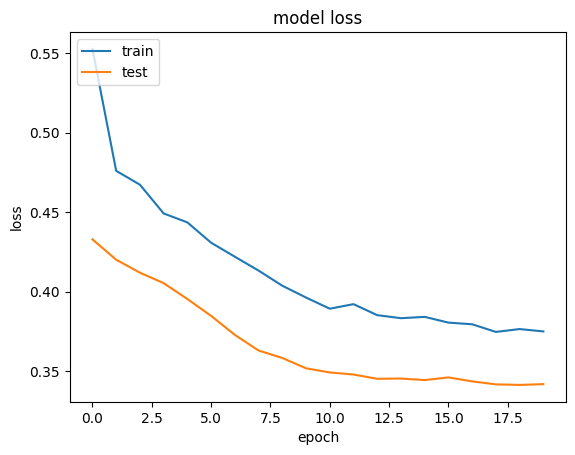

In [52]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
# Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
# Build the ANN model
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=10))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(32, activation='relu'))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['f1_score'])

# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


419/419 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - f1_score: 0.3395 - loss: 0.5579 - val_f1_score: 0.3261 - val_loss: 0.4248
Epoch 2/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.3393 - loss: 0.4673 - val_f1_score: 0.3261 - val_loss: 0.4087
Epoch 3/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - f1_score: 0.3522 - loss: 0.4535 - val_f1_score: 0.3261 - val_loss: 0.4010
Epoch 4/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.3552 - loss: 0.4362 - val_f1_score: 0.3261 - val_loss: 0.3859
Epoch 5/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - f1_score: 0.3535 - loss: 0.4328 - val_f1_score: 0.3261 - val_loss: 0.3690
Epoch 6/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - f1_score: 0.3443 - loss: 0.4237 - val_f1_score: 0.3261 - val_loss: 0.3610
Epoch 7/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3261 - loss: 0.3944 - val_f1_score: 0.3261 - val_loss: 0.3570
Epoch 8/50
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.3282 - loss: 0.3758 - val_f1_score: 0.3261 - val_

KeyError: 'accuracy'

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7500 - loss: 12.0770 - val_accuracy: 0.8052 - val_loss: 0.4951
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8054 - loss: 1.9050 - val_accuracy: 0.8052 - val_loss: 0.4949
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.5334 - val_accuracy: 0.8052 - val_loss: 0.5217
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7960 - loss: 0.5224 - val_accuracy: 0.8052 - val_loss: 0.5086
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7878 - loss: 0.5274 - val_accuracy: 0.8052 - val_loss: 0.5212
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7967 - loss: 2.5908 - val_accuracy: 0.8052 - val_loss: 0.5035
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7906 - loss: 0.6089 - val_accuracy: 0.8052 - val_loss: 0.5588
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7936 - loss: 5.5093 - val_accuracy: 

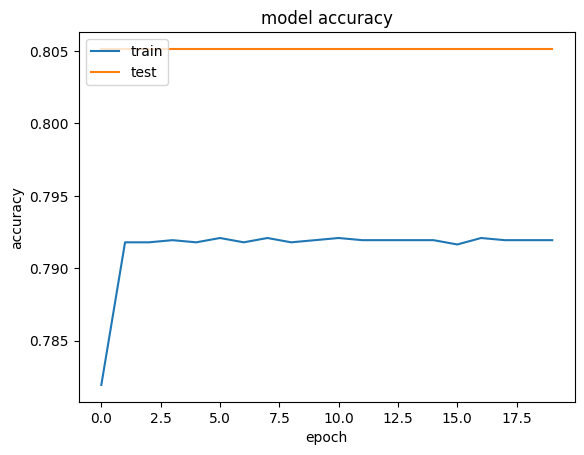

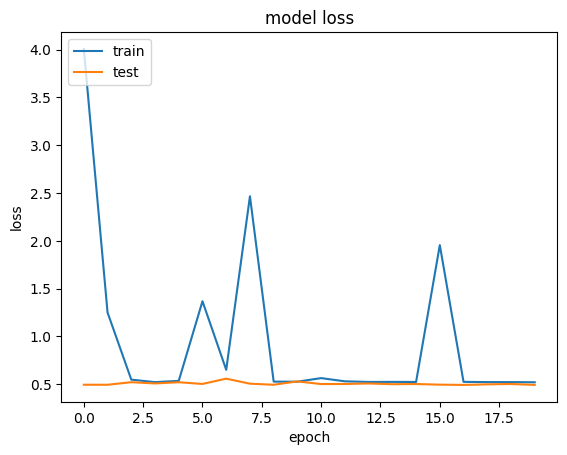

In [57]:
# Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
# Build the ANN model
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=10))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(32, activation='relu'))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Customize your optimizer
from keras.optimizers import Adam
custom_optimizer = Adam(learning_rate=0.9)

# Compile the model
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.3515 - loss: 18.6576 - val_f1_score: 0.3261 - val_loss: 0.5148
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.3432 - loss: 1.3701 - val_f1_score: 0.3261 - val_loss: 0.5002
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.3406 - loss: 1.2909 - val_f1_score: 0.3261 - val_loss: 0.4996
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.3341 - loss: 1.3008 - val_f1_score: 0.3261 - val_loss: 0.5088
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - f1_score: 0.3436 - loss: 0.9657 - val_f1_score: 0.3261 - val_loss: 0.4936
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - f1_score: 0.3448 - loss: 0.5294 - val_f1_score: 0.3261 - val_loss: 0.5164
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.3490 - loss: 11.4400 - val_f1_score: 0.3261 - val_loss: 0.5049
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1_score: 0.3512 - loss: 5.3311 - val_f1_score:

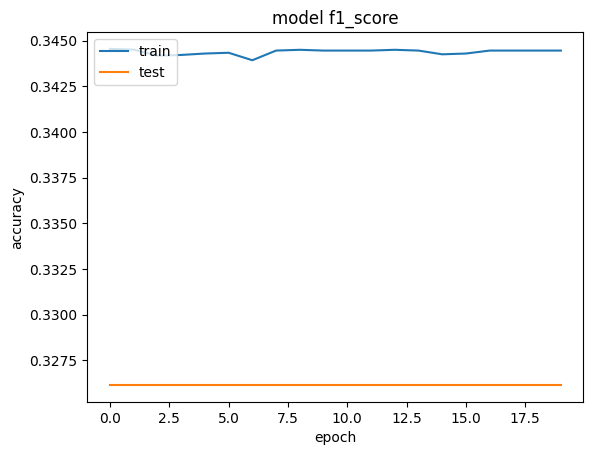

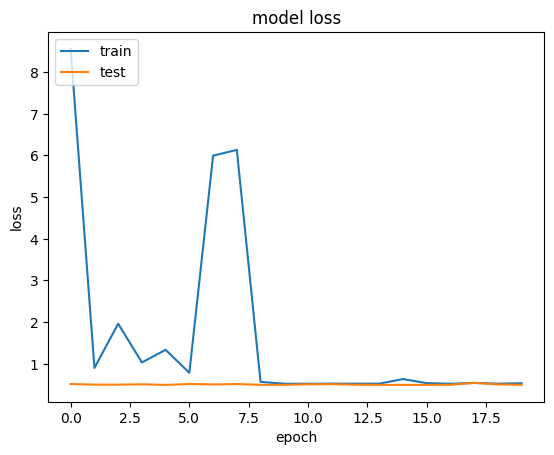

In [58]:
# Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
# Build the ANN model
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=10))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(32, activation='relu'))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Customize your optimizer
from keras.optimizers import Adam
custom_optimizer = Adam(learning_rate=0.9)

# Compile the model
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['f1_score'])

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7747 - loss: 11.6765 - val_accuracy: 0.8052 - val_loss: 0.5076
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7923 - loss: 0.6488 - val_accuracy: 0.8052 - val_loss: 0.4955
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7940 - loss: 1.0668 - val_accuracy: 0.8052 - val_loss: 0.5307
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7904 - loss: 0.5335 - val_accuracy: 0.8052 - val_loss: 0.4936
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7794 - loss: 0.5402 - val_accuracy: 0.8052 - val_loss: 0.5007
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7899 - loss: 0.5439 - val_accuracy: 0.8052 - val_loss: 0.5381
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8028 - loss: 0.5397
Accuracy: 0.8051515221595764
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


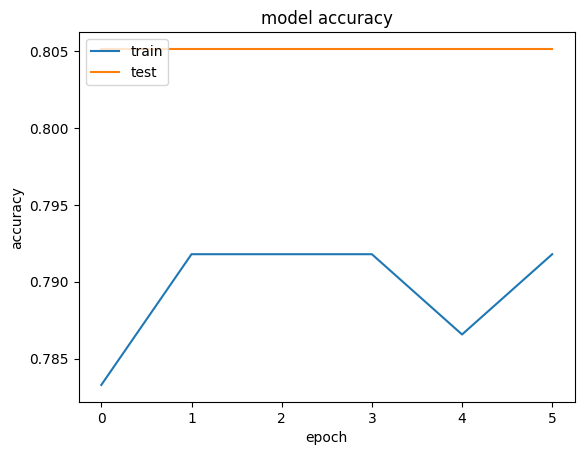

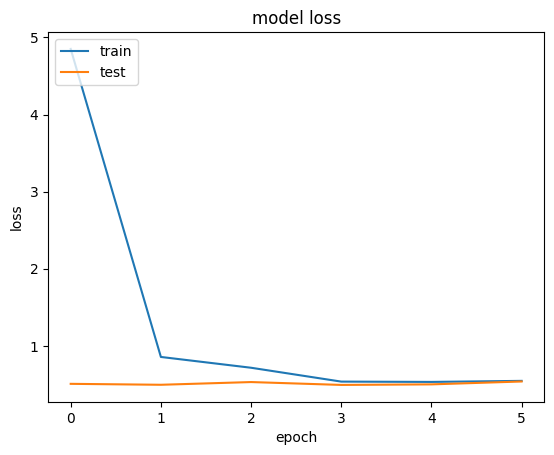

In [60]:
# Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
# Build the ANN model
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=10))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(32, activation='relu'))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Customize your optimizer
from keras.optimizers import Adam
custom_optimizer = Adam(learning_rate=0.9)

# Compile the model
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Add earlyStopping Callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping])

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7406 - loss: 0.5697 - val_accuracy: 0.8067 - val_loss: 0.4403 - learning_rate: 0.0010
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8037 - loss: 0.4694 - val_accuracy: 0.8164 - val_loss: 0.4205 - learning_rate: 9.0000e-04
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8011 - loss: 0.4524 - val_accuracy: 0.8224 - val_loss: 0.4207 - learning_rate: 8.1000e-04
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8036 - loss: 0.4540 - val_accuracy: 0.8270 - val_loss: 0.4111 - learning_rate: 7.2900e-04
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8054 - loss: 0.4488 - val_accuracy: 0.8270 - val_loss: 0.4054 - learning_rate: 6.5610e-04
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8053 - loss: 0.4434 - val_accuracy: 0.8318 - val_loss: 0.4049 - learning_rate: 5.9049e-04
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 

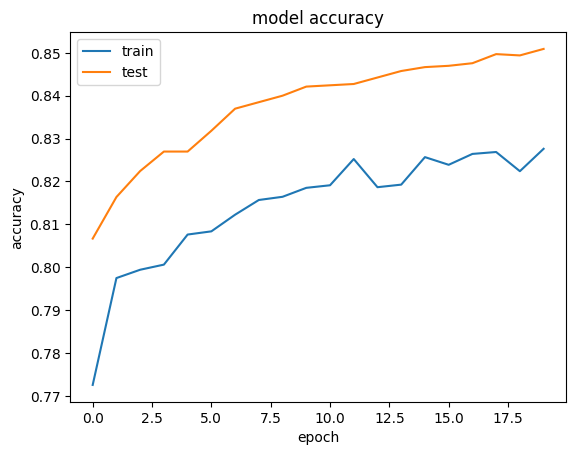

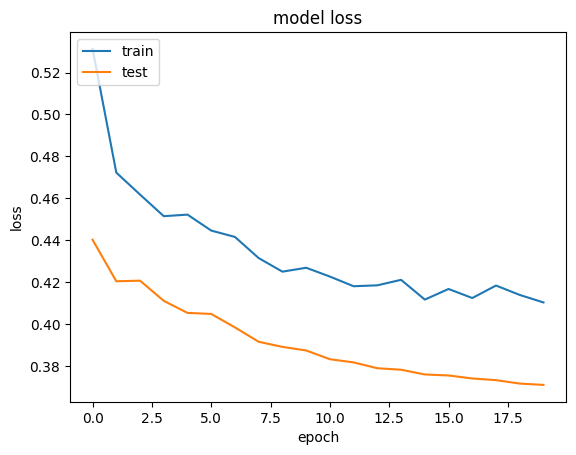

In [61]:
# Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
# Build the ANN model
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=10))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(32, activation='relu'))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Customize your optimizer
from keras.optimizers import Adam
custom_optimizer = Adam(learning_rate=0.9)



# Compile the model
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Add earlyStopping Callback
from keras.callbacks import EarlyStopping, LearningRateScheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping,lr_scheduler])

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [64]:
epoch=10
0.001 * 0.9 ** epoch

0.0003486784401000001

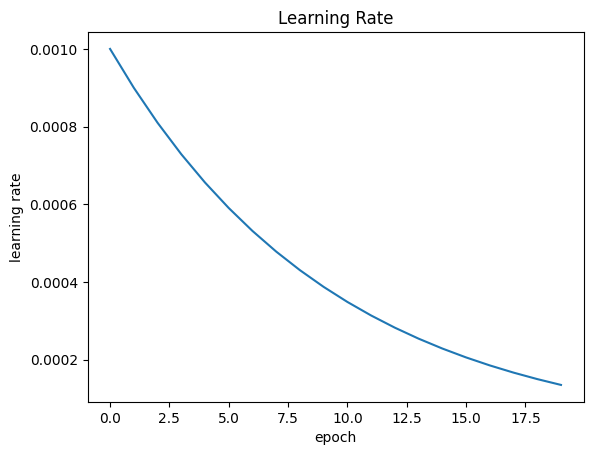

In [62]:
# track LR
plt.plot(history.history['learning_rate'])
plt.title('Learning Rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7594 - loss: 0.5596 - val_accuracy: 0.8061 - val_loss: 0.4483 - learning_rate: 0.0010
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7944 - loss: 0.4806 - val_accuracy: 0.8248 - val_loss: 0.4237 - learning_rate: 9.0000e-04
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7984 - loss: 0.4743 - val_accuracy: 0.8345 - val_loss: 0.4100 - learning_rate: 8.1000e-04
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8098 - loss: 0.4544 - val_accuracy: 0.8376 - val_loss: 0.4061 - learning_rate: 7.2900e-04
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7975 - loss: 0.4621 - val_accuracy: 0.8415 - val_loss: 0.3966 - learning_rate: 6.5610e-04
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8135 - loss: 0.4400 - val_accuracy: 0.8455 - val_loss: 0.3921 - learning_rate: 5.9049e-04
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0

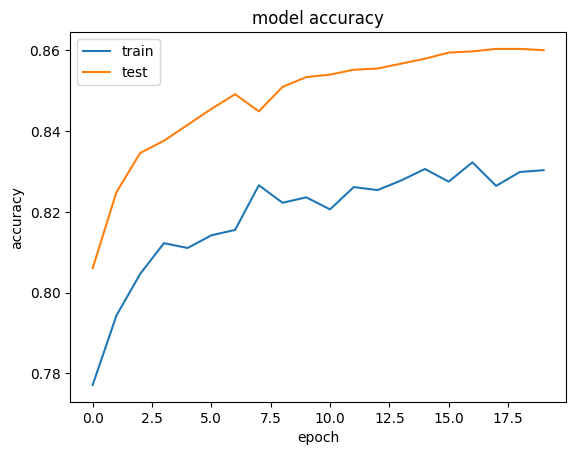

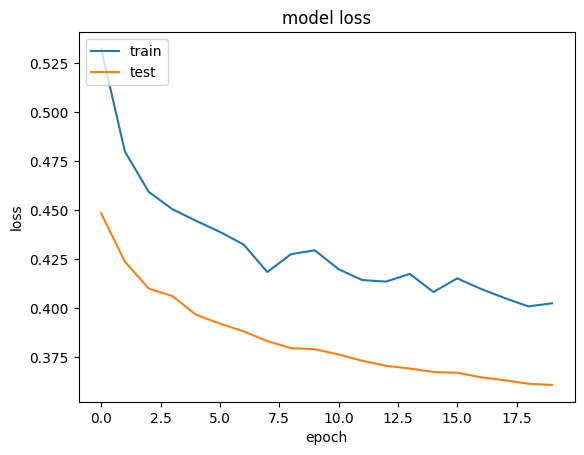

In [65]:
# Create a ANN network to solve this problem and achieve better accuracy than decision tree used here

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
# Build the ANN model
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=10))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(32, activation='relu'))
#Dropout
model.add(layers.Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Customize your optimizer
from keras.optimizers import Adam
custom_optimizer = Adam(learning_rate=0.9)



# Compile the model
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Add earlyStopping Callback
from keras.callbacks import EarlyStopping, LearningRateScheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)
#Tensorboard
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='/content/sample_data/model_logs', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping,lr_scheduler,tensorboard])

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Grid Search

In [51]:
!pip install scikeras

In [ ]:
# prompt: Can you improve this model further

# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam'):
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim=10))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [8,16,32],
    'epochs': [10,30,50],
    'optimizer': ['adam','rmsprop','SGD']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_result = grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
accuracy = best_model.score(X_test, y_test)
print('Accuracy of best model: {}'.format(accuracy))

